#### Import required libraries, packages

In [1]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Read a csv file as pandas dF

Executing the next cell will prompt to locate the csv file

In [2]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

dF = pd.read_csv(file_path)
dF = pd.DataFrame(dF)
dF

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,51.4,2.0
...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,44.8,1.6


In [3]:
# number of unique values in the model column
print(dF['model'].unique())

[' I20' ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq' ' Kona'
 ' Veloster' ' I800' ' IX20' ' Santa Fe' ' Accent' ' Terracan' ' Getz'
 ' Amica']


In [4]:
# filtering to a secific model, 'Tucson' in this case
dF_tucson = dF[dF['model'] == ' Tucson']

display(dF_tucson)
print(dF_tucson.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
1,Tucson,2016,14499,Automatic,25233,Diesel,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,61.7,1.7
7,Tucson,2016,14199,Automatic,30300,Diesel,57.6,1.7
9,Tucson,2016,12163,Manual,21014,Diesel,61.7,1.7
10,Tucson,2017,13200,Manual,22888,Diesel,61.7,1.7
...,...,...,...,...,...,...,...,...
4838,Tucson,2017,14985,Manual,38192,Diesel,54.3,2.0
4839,Tucson,2016,11485,Manual,51696,Diesel,61.7,1.7
4853,Tucson,2016,12495,Manual,35000,Diesel,61.7,1.7
4858,Tucson,2018,13994,Manual,23313,Petrol,44.8,1.6


(1300, 8)


In [5]:
# find the average price of the ' Tucson' model cars
dF_tucson['price'].mean()

15818.713846153847

#### Data aggregation

In [6]:
dF_agg = dF.groupby('model')['price'].agg(['count', 'mean', 'sum'])
display(dF_agg)

,count,mean,sum
model,,,
Accent,1,1295.000000,1295
Amica,1,1750.000000,1750
Getz,6,1927.500000,11565
I10,1092,7741.870879,8454123
I20,496,8810.721774,4370118
I30,536,11609.555970,6222722
I40,127,10927.188976,1387753
I800,117,16659.076923,1949112
IX20,204,8812.867647,1797825


#### Data preprocessing before visualization

In [7]:
# sort the dataframe based on the column 'count'
dF_agg = dF_agg.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
dF_agg['percent_of_cars'] = (dF_agg['count']/dF_agg['count'].sum())*100

# convert the 'sum' column in millions
dF_agg['sum'] = dF_agg['sum']/1000000

# keep up to two decimal points
dF_agg = dF_agg.round(2)

# remove the 'count' column
dF_agg = dF_agg.drop('count', axis=1)

display(dF_agg.head())

,mean,sum,percent_of_cars
model,,,
Tucson,15818.71,20.56,26.75
I10,7741.87,8.45,22.47
I30,11609.56,6.22,11.03
I20,8810.72,4.37,10.21
Kona,15652.78,5.13,6.75


#### Barplot: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType
#### Questions in mind: Based on model, transmission and fuelType,

- What are the top 5 selling car models in the dataset?
- What's the average selling price of the top 5 selling car models?
- What's the total sale of the top 5 selling car models?

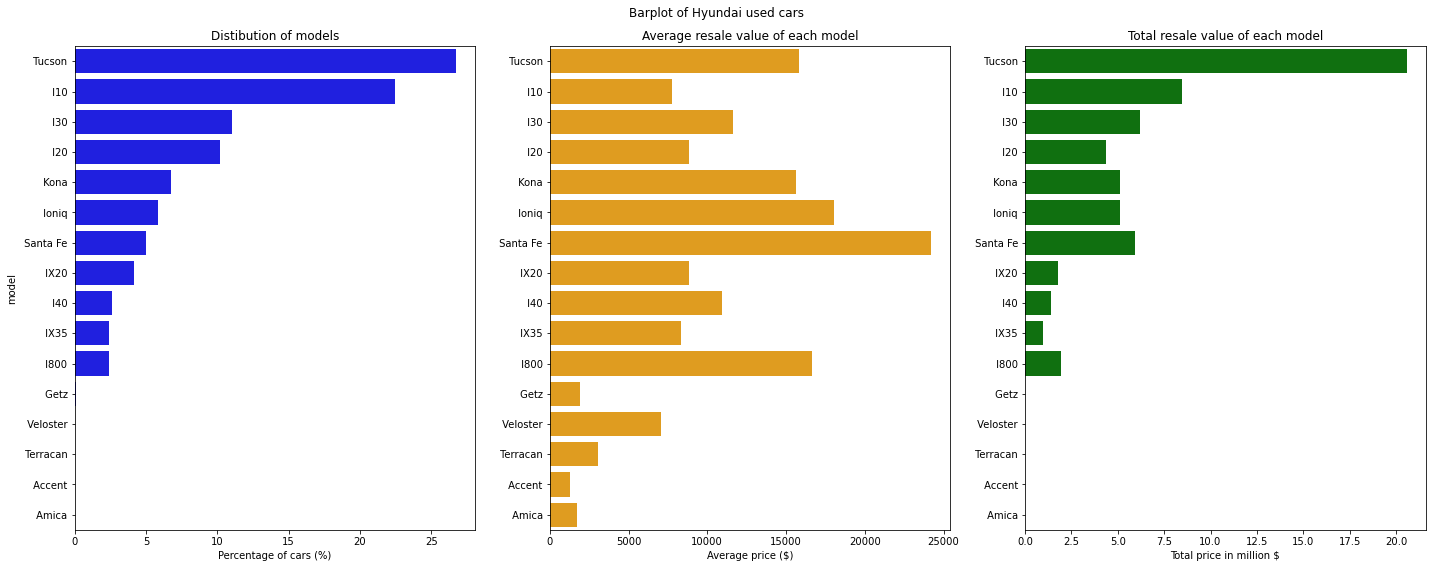

In [8]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=dF_agg.index, data=dF_agg, orient='h', color='blue')
plt.title("Distibution of models")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=dF_agg.index, data=dF_agg, orient='h', color='orange')
plt.title("Average resale value of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=dF_agg.index, data=dF_agg, orient='h', color='green')
plt.title("Total resale value of each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of Hyundai used cars")
plt.tight_layout()
plt.show()

From the above plots, it's visible that not only the model 'Tucson' has the biggest market share among the Hyundai cars, but also the resale price of 'Tucson' is unparallel to other Hyundai models.

##### Now the same analysis will be done but in terms of 'transmission'

In [9]:
# number of unique values in the transmission column
print(dF['transmission'].unique())

['Manual' 'Automatic' 'Semi-Auto' 'Other']


In [10]:
# filtering to a secific transmission type, 'Automatic' in this case
dF_auto = dF[dF['transmission'] == 'Automatic']

display(dF_auto)
print(dF_auto.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
1,Tucson,2016,14499,Automatic,25233,Diesel,43.5,2.0
7,Tucson,2016,14199,Automatic,30300,Diesel,57.6,1.7
8,I30,2018,10399,Automatic,38082,Petrol,51.4,1.4
29,Tucson,2016,15800,Automatic,20025,Diesel,57.6,1.7
30,Ioniq,2018,15000,Automatic,32227,Hybrid,78.5,1.6
...,...,...,...,...,...,...,...,...
4831,Santa Fe,2018,20985,Automatic,31123,Diesel,42.8,2.2
4834,Tucson,2016,16485,Automatic,31485,Diesel,43.5,2.0
4846,I20,2018,9985,Automatic,20796,Petrol,45.6,1.4
4847,I30,2018,12985,Automatic,30308,Petrol,51.4,1.4


(669, 8)


In [11]:
# find the average mileage of the 'automatic' transmission cars
dF_auto['price'].mean()

16369.224215246637

In [12]:
dF_agg_auto = dF.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])
display(dF_agg_auto)

,count,mean,sum
transmission,,,
Automatic,669,16369.224215,10951011
Manual,3611,11059.049571,39934228
Other,2,14745.000000,29490
Semi-Auto,578,19119.217993,11050908


In [13]:
# sort the dataframe based on the column 'count'
dF_agg_auto = dF_agg_auto.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
dF_agg_auto['percent_of_cars'] = (dF_agg_auto['count']/dF_agg_auto['count'].sum())*100

# convert the 'sum' column in millions
dF_agg_auto['sum'] = dF_agg_auto['sum']/1000000

# keep up to two decimal points
dF_agg_auto = dF_agg_auto.round(2)

# remove the 'count' column
dF_agg_auto = dF_agg_auto.drop('count', axis=1)

display(dF_agg_auto.head())

,mean,sum,percent_of_cars
transmission,,,
Manual,11059.05,39.93,74.30
Automatic,16369.22,10.95,13.77
Semi-Auto,19119.22,11.05,11.89
Other,14745.00,0.03,0.04


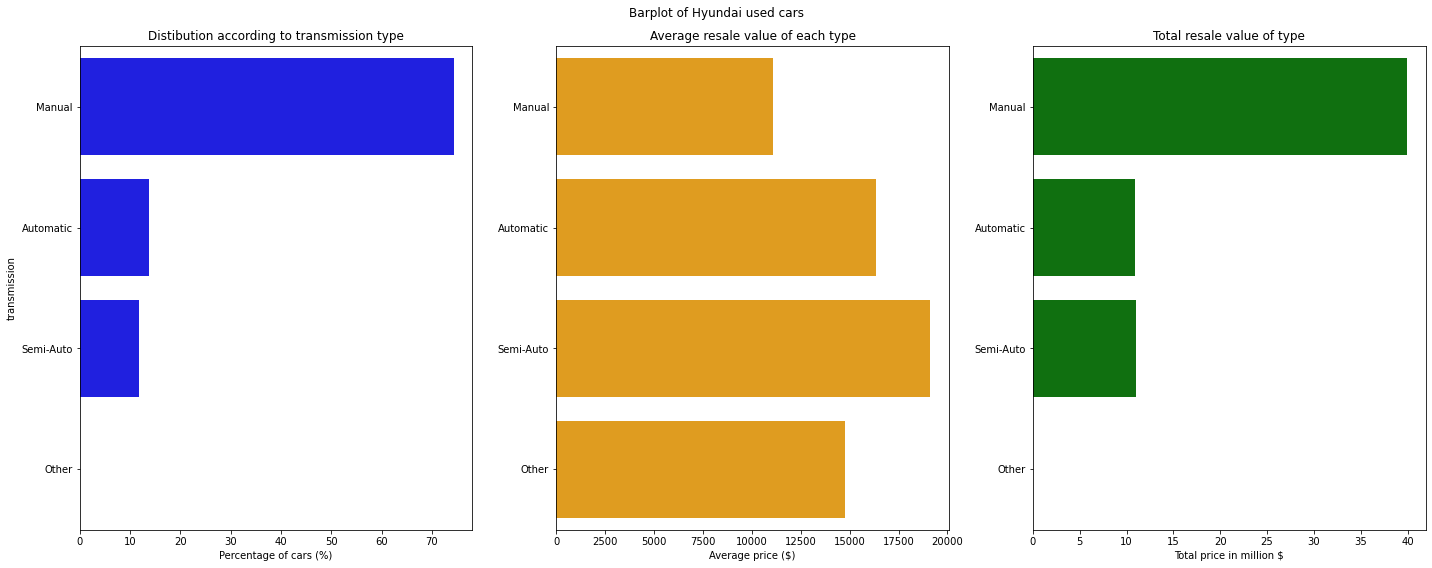

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=dF_agg_auto.index, data=dF_agg_auto, orient='h', color='blue')
plt.title("Distibution according to transmission type")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=dF_agg_auto.index, data=dF_agg_auto, orient='h', color='orange')
plt.title("Average resale value of each type")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=dF_agg_auto.index, data=dF_agg_auto, orient='h', color='green')
plt.title("Total resale value of type")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of Hyundai used cars")
plt.tight_layout()
plt.show()

From the above plots, it's visible that the manual transmission cars has the biggest market share among the Hyundai cars. Also the resale price of manual transmission cars is unparallel to other types.

##### Now the same analysis will be done but in terms of 'Fuel type'

In [15]:
# number of unique values in the transmission column
print(dF['fuelType'].unique())

['Petrol' 'Diesel' 'Hybrid' 'Other']


In [16]:
# filtering to a secific fuel type, 'Petrol' in this case
dF_fuel = dF[dF['fuelType'] == 'Petrol']

display(dF_fuel)
print(dF_fuel.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,58.9,1.2
3,I10,2016,6499,Manual,23789,Petrol,60.1,1.0
5,I10,2015,6149,Manual,41650,Petrol,60.1,1.0
6,I20,2015,6799,Manual,39547,Petrol,55.4,1.2
8,I30,2018,10399,Automatic,38082,Petrol,51.4,1.4
...,...,...,...,...,...,...,...,...
4850,I10,2018,7200,Manual,17879,Petrol,60.1,1.0
4851,I10,2018,7995,Manual,8851,Petrol,60.1,1.0
4852,I10,2018,7200,Manual,14788,Petrol,60.1,1.0
4857,I10,2017,6830,Manual,13810,Petrol,60.1,1.0


(2902, 8)


In [17]:
# find the average mileage of the 'automatic' transmission cars
dF_fuel['price'].mean()

10952.221571330118

In [18]:
dF_agg_fuel = dF.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])
display(dF_agg_fuel)

,count,mean,sum
fuelType,,,
Diesel,1608,14589.905473,23460568
Hybrid,349,19223.272206,6708922
Other,1,12800.000000,12800
Petrol,2902,10952.221571,31783347


In [19]:
# sort the dataframe based on the column 'count'
dF_agg_fuel = dF_agg_fuel.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
dF_agg_fuel['percent_of_cars'] = (dF_agg_fuel['count']/dF_agg_fuel['count'].sum())*100

# convert the 'sum' column in millions
dF_agg_fuel['sum'] = dF_agg_fuel['sum']/1000000

# keep up to two decimal points
dF_agg_fuel = dF_agg_fuel.round(2)

# remove the 'count' column
dF_agg_fuel = dF_agg_fuel.drop('count', axis=1)

display(dF_agg_fuel.head())

,mean,sum,percent_of_cars
fuelType,,,
Petrol,10952.22,31.78,59.71
Diesel,14589.91,23.46,33.09
Hybrid,19223.27,6.71,7.18
Other,12800.00,0.01,0.02


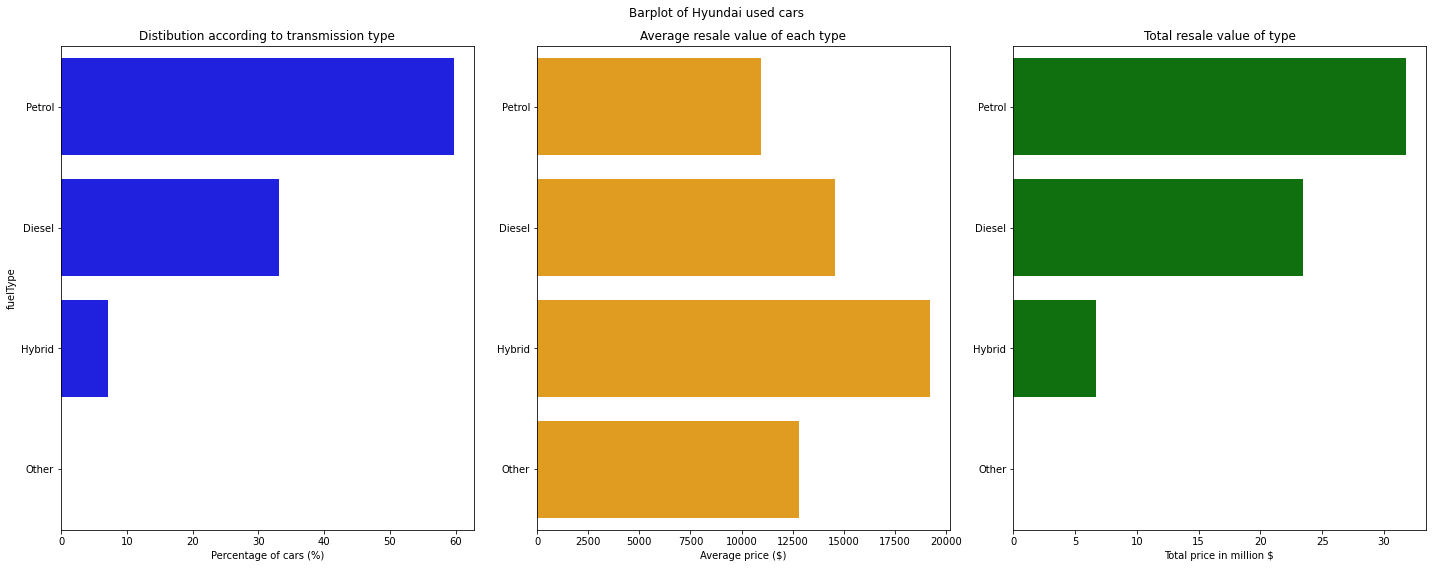

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=dF_agg_fuel.index, data=dF_agg_fuel, orient='h', color='blue')
plt.title("Distibution according to transmission type")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=dF_agg_fuel.index, data=dF_agg_fuel, orient='h', color='orange')
plt.title("Average resale value of each type")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=dF_agg_fuel.index, data=dF_agg_fuel, orient='h', color='green')
plt.title("Total resale value of type")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of Hyundai used cars")
plt.tight_layout()
plt.show()

From the above plots, it's visible that the manual petrol-driven cars has the biggest market share among the Hyundai cars. Also the resale price of petrol-driven cars is hogher than the other fuel types.